## Dataset Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


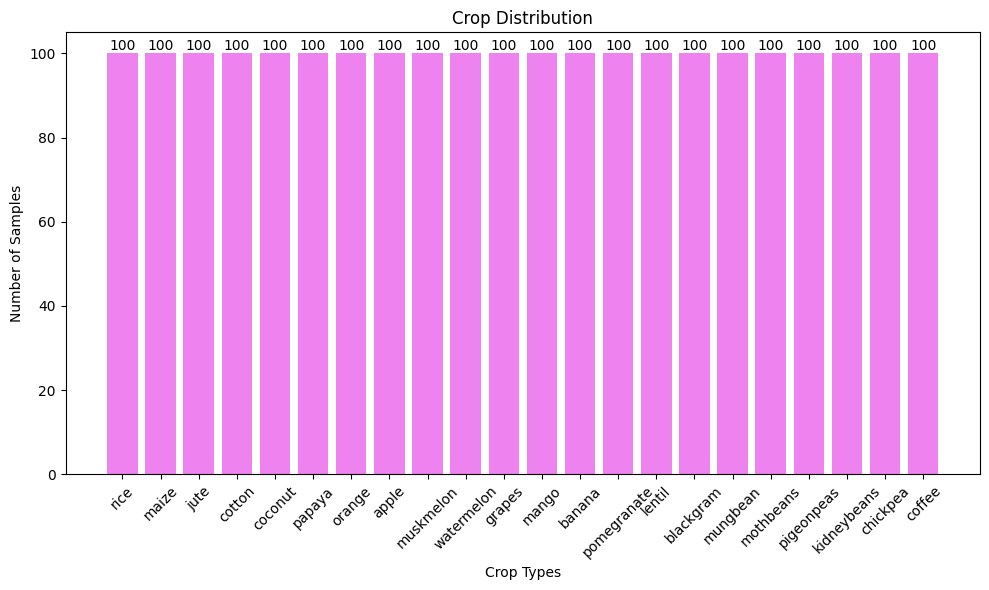

In [60]:

crop_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(crop_counts.index, crop_counts.values, color='violet')

plt.xlabel('Crop Types')
plt.ylabel('Number of Samples')
plt.title('Crop Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
print(df.isna().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [10]:
X = df.drop('label', axis=1)
y = df['label']


In [14]:
unique_classes = y.unique()  
print(unique_classes)
print("Number of unique classes:", len(unique_classes))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Number of unique classes: 22


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1,1))

y_test_encoded = encoder.transform(y_test.values.reshape(-1,1))


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)


In [21]:
print(y_train_encoded[0])
print(X_train_scaled[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[-0.9034266  -1.1261617  -0.6685066  -1.80469186  0.93658618  0.19347378
  0.0051497 ]


# Modelling

In [34]:
from tensorflow.keras.layers import Dense
model_1 = tf.keras.Sequential([
    Dense(64, input_shape=(7,),activation='relu'),  
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(22,activation='softmax')

])
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_1.fit(X_train_scaled,y_train_encoded,epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 11ms/step - loss: 2.6401 - accuracy: 0.3517
Epoch 2/10
55/55 [==============================] - 1s 10ms/step - loss: 1.2120 - accuracy: 0.7284
Epoch 3/10
55/55 [==============================] - 1s 10ms/step - loss: 0.5025 - accuracy: 0.8670
Epoch 4/10
55/55 [==============================] - 1s 9ms/step - loss: 0.3074 - accuracy: 0.9233
Epoch 5/10
55/55 [==============================] - 1s 10ms/step - loss: 0.2155 - accuracy: 0.9409
Epoch 6/10
55/55 [==============================] - 1s 10ms/step - loss: 0.1620 - accuracy: 0.9534
Epoch 7/10
55/55 [==============================] - 1s 10ms/step - loss: 0.1358 - accuracy: 0.9597
Epoch 8/10
55/55 [==============================] - 1s 10ms/step - loss: 0.1088 - accuracy: 0.9687
Epoch 9/10
55/55 [==============================] - 1s 10ms/step - loss: 0.0962 - accuracy: 0.9699
Epoch 10/10
55/55 [==============================] - 1s 10ms/step - loss: 0.0870 - accuracy: 0.9733


## Evaluation

In [53]:
y_pred = model_1.predict(x_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels[:5])
crop_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
              'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 
              'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 
              'coconut', 'cotton', 'jute', 'coffee']
index_to_crop = {i: crop for i, crop in enumerate(crop_names)}
y_pred_crops = [index_to_crop[i] for i in y_pred_labels]
print(y_pred_crops[:6])

14/14 [==============================] - 0s 3ms/step
[15 21 17 17  0]
['apple', 'coffee', 'papaya', 'papaya', 'rice', 'grapes']


In [55]:
from sklearn.metrics import classification_report
import numpy as np

y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

crop_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
              'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 
              'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 
              'coconut', 'cotton', 'jute', 'coffee']


report = classification_report(y_test_labels, y_pred_labels, target_names=crop_names)

print(report)


              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
    chickpea       1.00      0.95      0.97        20
 kidneybeans       1.00      1.00      1.00        26
  pigeonpeas       1.00      1.00      1.00        27
   mothbeans       1.00      0.94      0.97        17
    mungbean       0.94      1.00      0.97        17
   blackgram       1.00      1.00      1.00        14
      lentil       0.85      0.74      0.79        23
 pomegranate       0.95      0.95      0.95        20
      banana       0.73      1.00      0.85        11
       mango       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      0.88      0.93        24
   muskmelon       1.00      1.00      1.00        19
       apple       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [57]:
import random
random_indices = random.sample(range(len(y_test_labels)), 5)


for i in random_indices:
    true_crop = crop_names[y_test_labels[i]] 
    predicted_crop = crop_names[y_pred_labels[i]] 
    print(f"Sample {i}: True label: {true_crop}, Predicted label: {predicted_crop}")

Sample 234: True label: grapes, Predicted label: grapes
Sample 19: True label: apple, Predicted label: apple
Sample 207: True label: maize, Predicted label: maize
Sample 294: True label: mothbeans, Predicted label: mothbeans
Sample 151: True label: banana, Predicted label: banana
